# Consensus Motif # 
Find conserved patterns across multiple time series

Stumpy Tutorial Consenus Motif:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile XV: ConsensusMotifs:
https://sites.google.com/site/consensusmotifs/

In [13]:
from core import utils

import stumpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
from scipy.cluster.hierarchy import linkage, dendrogram


## Phylogeny Using Mitochondrial DNA (mtDNA) (MP XV) ##

determine evolutionary relationships between organisms (phylogeny)

From https://stumpy.readthedocs.io/en/latest/Tutorial_Consensus_Motif.html

https://zenodo.org/record/4289120


In [14]:
# Parameter
animals = ['python', 'hippo', 'red_flying_fox', 'alpaca']
dna_seqs = {}
truncate = 15000
for animal in animals:
    dna_seqs[animal] = pd.read_csv(f"https://zenodo.org/record/4289120/files/{animal}.csv?download=1").iloc[:truncate, 0].values

Ts = list(dna_seqs.values())

colors = {'python': 'tab:blue', 'hippo': 'tab:green', 'red_flying_fox': 'tab:purple', 'alpaca': 'tab:red'}

In [15]:
def visualize_consensusmotif(Ts, Ts_idx, subseq_idx, window_range, d):
    # visualize consensus motif snippet
    consensus_motif = Ts[Ts_idx][subseq_idx : subseq_idx + window_range]
    nn_idx = []
    for i, T in enumerate(Ts):
        nn_idx.append(np.argmin(stumpy.core.mass(consensus_motif, T)))
        lw = 1
        label = None
        if i == Ts_idx:
            lw = 4
            label = 'Consensus Motif'
        plt.plot(stumpy.core.z_norm(T[nn_idx[i] : nn_idx[i]+window_range]), lw=lw, label=label)

    plt.title(f'The Consensus Motif (Z-normalized): Dilation = {d}, Range = {window_range}')
    plt.xlabel('Number of mtDNA Base Pairs')
    plt.legend()
    plt.show()
    plt.clf()

    # # plot time series
    # fig, ax = plt.subplots(len(Ts), sharex=True, sharey=True)
    # colors = plt.rcParams["axes.prop_cycle"]()
    # for i, T in enumerate(Ts):
    #     ax[i].plot(T, color=next(colors)["color"])
    #     ax[i].set_ylim((-330, 1900))
    # plt.subplots_adjust(hspace=0)
    # plt.xlabel('Time')

    # # visualize consensus motif on top
    # ymin, ymax = ax[i].get_ylim()
    # for i in range(len(Ts)):
    #     r = Rectangle((nn_idx[i], ymin), window_range, ymax-ymin, alpha=0.3)
    #     ax[i].add_patch(r)
    # plt.suptitle(f'Dilation = {d}, Range = {window_range}', fontsize=14)
    # plt.show()


    # Extract Animal DNA Subsequence Closest to the Consensus Motif
    dna_subseqs = {}
    for animal in animals:
        idx = np.argmin(stumpy.core.mass(consensus_motif, dna_seqs[animal]))
        dna_subseqs[animal] = stumpy.core.z_norm(dna_seqs[animal][idx : idx + window_range])

    fig, ax = plt.subplots(ncols=2)

    # Left
    for animal, dna_subseq in dna_subseqs.items():
        ax[0].plot(dna_subseq, label=animal, color=colors[animal])
    ax[0].legend()
    ax[0].set_title(f'Dilation = {d}, Range = {window_range}')
    ax[0].set_xlabel('Number of mtDNA Base Pairs')

    # Right
    pairwise_dists = []
    for i, animal_1 in enumerate(animals):
        for animal_2 in animals[i+1:]:
            pairwise_dists.append(stumpy.core.mass(dna_subseqs[animal_1], dna_subseqs[animal_2]).item())
    Z = linkage(pairwise_dists, optimal_ordering=True)
    dendrogram(Z, labels=animals, ax=ax[1])
    ax[1].set_title(f'Dilation = {d}, Range = {window_range}')
    ax[1].set_ylabel('Z-normalized Euclidean Distance')

    plt.show()


Max Dilation: 10


/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `ostinato(['Ts', 'm', 'd']) and function `aamp_ostinato(['Ts', 'm']) have different arguments/parameters.
  warnings.warn(msg)


Dilation=1, w=1000: Best Radius 2.73 in ts 1 starting at 602.


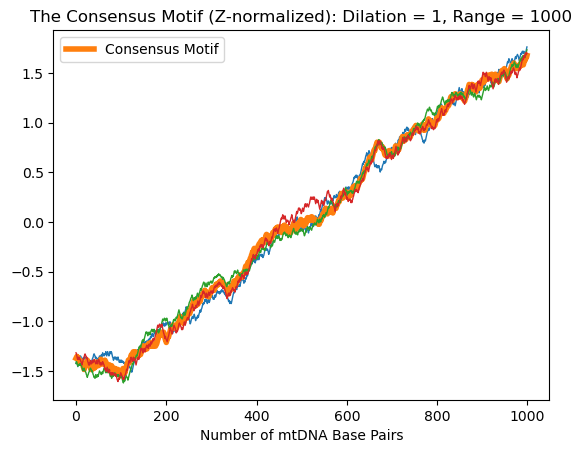

<Figure size 640x480 with 0 Axes>

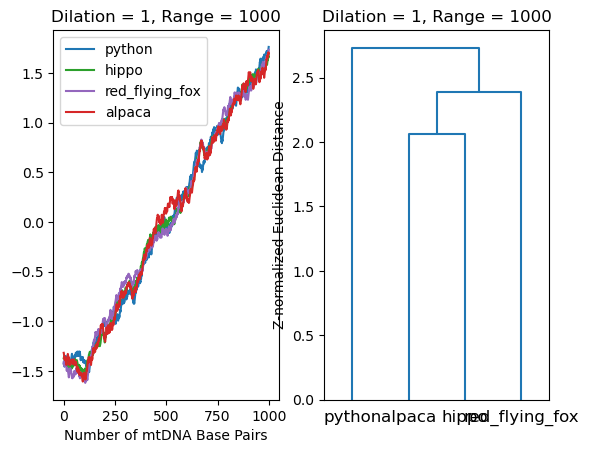

Dilation=2, w=1001: Best Radius 2.23 in ts 2 starting at 944.


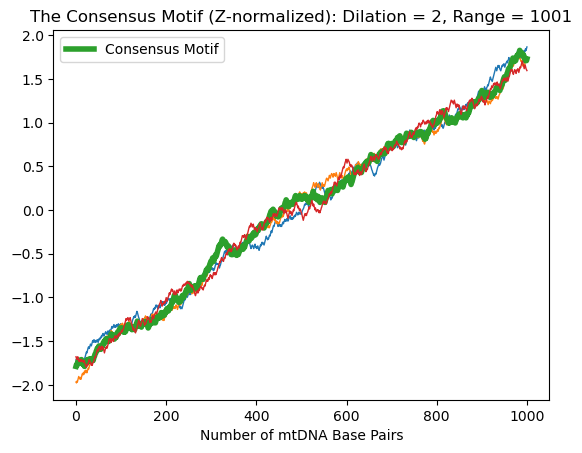

<Figure size 640x480 with 0 Axes>

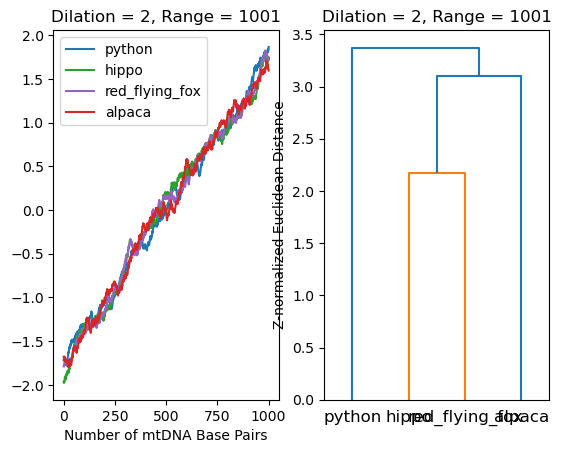

Dilation=3, w=1000: Best Radius 2.17 in ts 1 starting at 280.


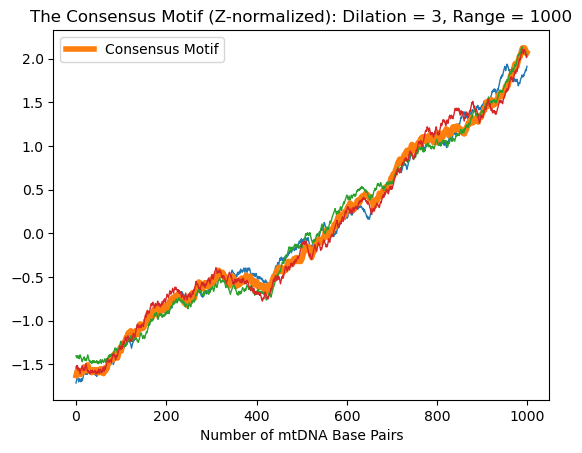

<Figure size 640x480 with 0 Axes>

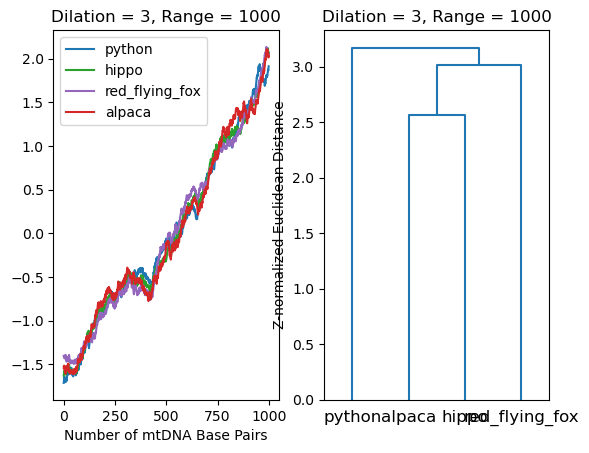

Dilation=4, w=1001: Best Radius 2.05 in ts 1 starting at 798.


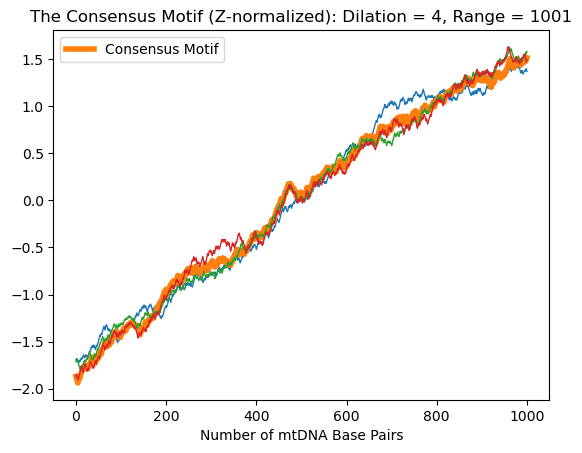

<Figure size 640x480 with 0 Axes>

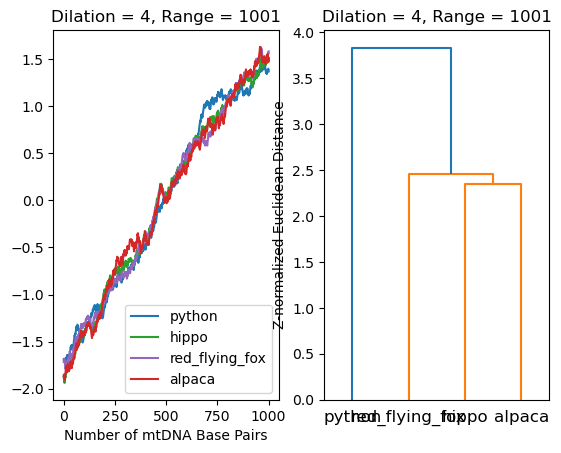

Dilation=5, w=1001: Best Radius 1.74 in ts 1 starting at 293.


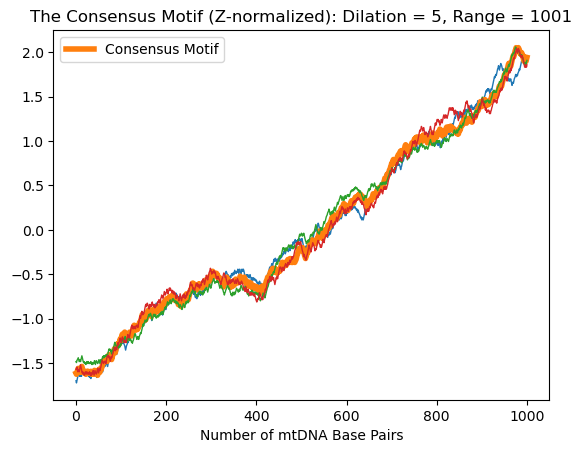

<Figure size 640x480 with 0 Axes>

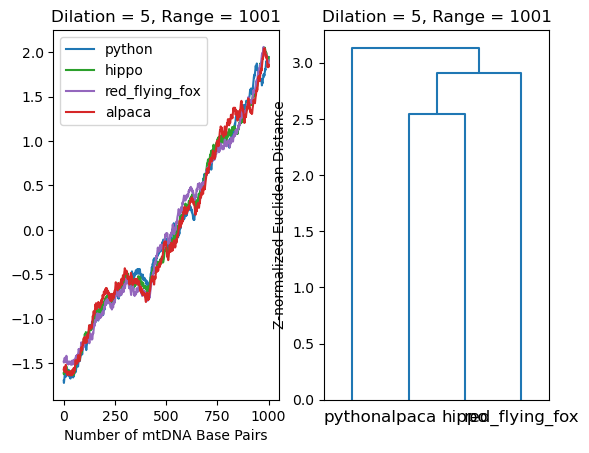

Dilation=6, w=997: Best Radius 1.7 in ts 1 starting at 333.


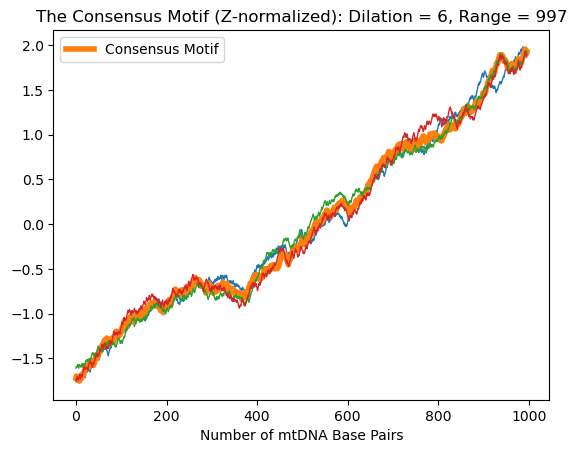

<Figure size 640x480 with 0 Axes>

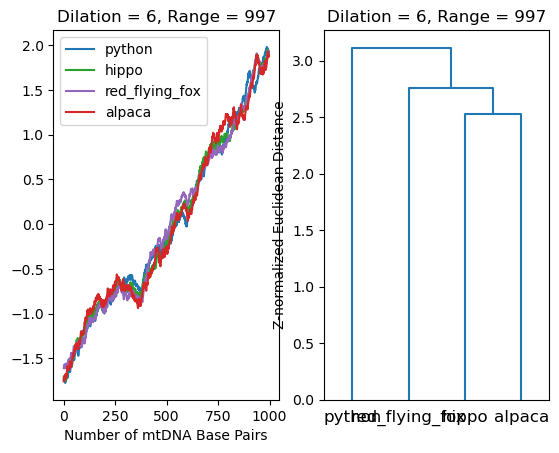

Dilation=7, w=1002: Best Radius 1.6 in ts 3 starting at 802.


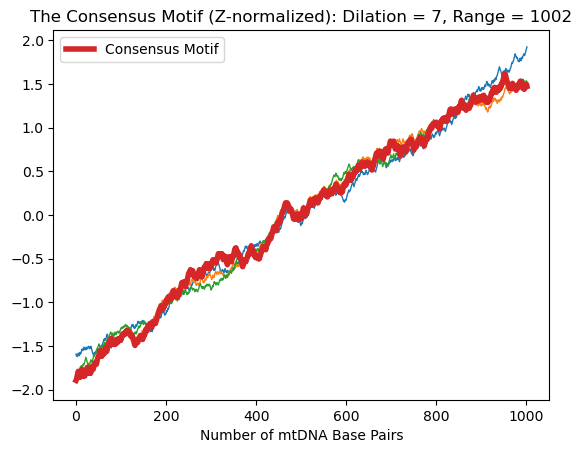

<Figure size 640x480 with 0 Axes>

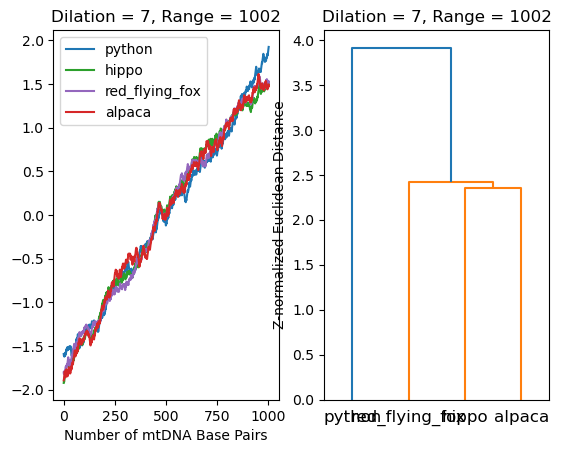

Dilation=8, w=1001: Best Radius 1.43 in ts 3 starting at 802.


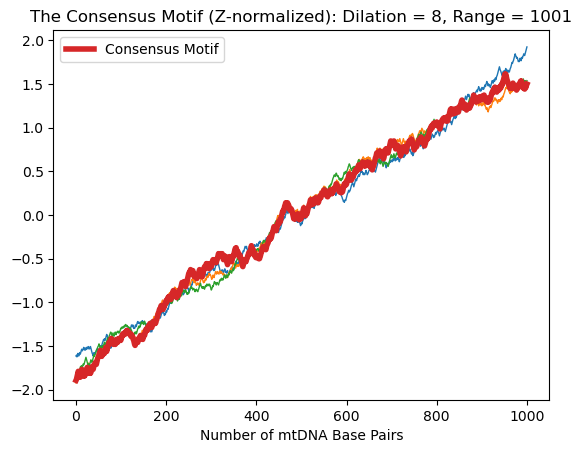

<Figure size 640x480 with 0 Axes>

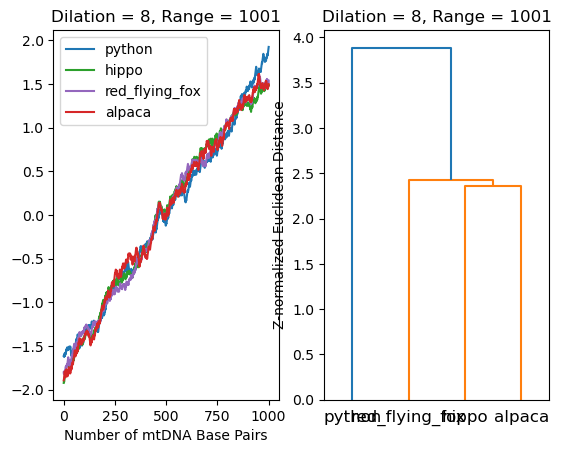

Dilation=9, w=1000: Best Radius 1.34 in ts 3 starting at 809.


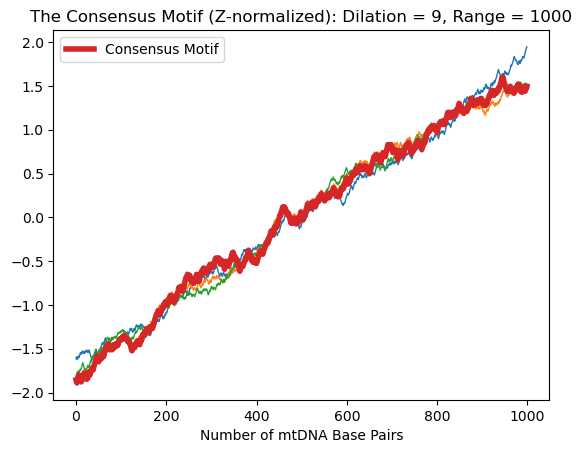

<Figure size 640x480 with 0 Axes>

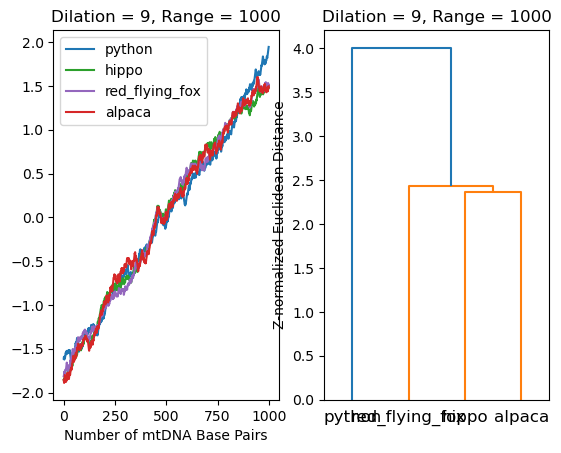

In [16]:
target_w = 1000
max_dilation = 10 # utils.calculate_max_d_from_target_w(target_w)
print(f'Max Dilation: {max_dilation}')
for d in range(1, max_dilation):
    m = round((target_w-1)/d) + 1
    actual_w = (m-1)*d + 1
    radius, Ts_idx, subseq_idx = stumpy.ostinato(Ts, m, d)
    print(f'Dilation={d}, w={actual_w}: Best Radius {np.round(radius, 2)} in ts {Ts_idx} starting at {subseq_idx}.') # Best Radius: minimum distance between subsequence Ts_idx and its set of nearest neighbor
    visualize_consensusmotif(Ts, Ts_idx, subseq_idx, actual_w, d)
    